# Predicting chronic kidney disease

# Abstract
Learning project using supervised machine learning algorithms (logistic regression, k nearest neighbour and random forests available in python package sklearn) to predict chronic kidney disease (CKD) based off a large list of features. High recall values were consistently obtained in each algorithm indicating a low rate of false negatives - a valued feature of disease diagnosis algorithms. The dataset was cleaned - replaced erroneous values, fixed datatypes and addressed missing entries. Three different methods of missing entry replacement was performed. On average it is found that logistic regression and k nearest neighbour algorithms perform best by retaining as many features as possible, replacing missing entries with the mean the feature. Random forest algorithms showed no preference on method of data replacement. 

# Contents
<ul>
    <li>
      Dataset
    </li>
    <li>
      Data cleaning (errors and converting datatype)
      <ul>
          <li>Removing redundant features</li>
          <li>
              Categoric features
              <ul>
                  <li>Removing erroneous entries</li>
                  <li>Dummy variables</li>
              </ul>
          </li>
          <li>
              Numeric features
              <ul>
                  <li>Removing erroneous entries</li>
                  <li>Correcting datatype of numeric strings</li>
              </ul>
          </li>
      </ul>
  </li>
  <li>
       Data visualisation
  </li>
  <li>
       Data cleaning (missing values)
       <ul>
          <li>Reduce dataset due to sparse missing entries</li>
          <li>Create datasets with different cleaning methods
              <ul>
                  <li>Dataset 0 - Remove any features with missing entries</li>
                  <li>Dataset 1 - Remove subset of features with few missing entries, inpute average for remaining missing entries</li> 
              <li>Dataset 2 - Impute average for all missing entries</li> 
              </ul>
       </ul>
  </li>
  <li>
       Machine learning<ul>
    <li>Logistical regression</li>
    <li>K nearest neighbours</li>
    <li>Random forest decision trees</li>
    </ul>
  </li>
  <li>Conclusion</li>
</ul>

# Dataset
Import dataset as a DataFrame from the pandas library. Dataset from kaggle.com (https://www.kaggle.com/datasets/mansoordaku/ckdisease).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('kidney_disease.csv')

Dataset contains 400 rows (patients) with each patient being described by 26 features. One of these features is the id of the patient, another feature descibres if they have chronic kidney disease (CKD), the remaining features give information on the patients which will ultimetely be used to predict if the patient has CKD.

In [3]:
df.head(3)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

We have one feature with patient ID ['id' (int)], 23 features containing information about each patient ("age" through "ane"). The features contain the following information for each patient:
<ul>
    <li>'age' (float) - Age</li>
    <li>'bp' (float) - Blood pressure</li>
    <li>'rbc' (str) - Red blood cells</li>
    <li>'pcc' (str) - pus cell clumps</li>
    <li>'ba' (str) - bacteria</li>
    <li>'bgr' (float) - blood glucose random</li>
    <li>'bu' (float) - blood urea</li>
    <li>'sc' (float) - serum creatinine</li>
    <li>'sod' (float) - sodium</li>
    <li>'pot' (float) - potassium</li>
    <li>'hemo' (float) - hemoglobin</li>
    <li>'pcv' (float **curr. string**) - packed cell volume</li>
    <li>'wc' (float **curr. string**) - white blood cell count</li>
    <li>'rc' (float **curr. string**) - red blood cell count</li>
    <li>'htn' (str) - hypertension</li>
    <li>'dm' (str) - diabetes mellitus</li>
    <li>'cad' (str) - coronary artery disease</li>
    <li>'appet' (str) - appetite</li>
    <li>'pe' (str) - pedal edema</li>
    <li>'ane' (str) - anemia</li>
</ul>
Lastly each patient either has or does not have chronic kidney disease ['classification' (str)].

We note that features 'pcv', 'wc' and 'rc' have been read in as strings when they should be floats. We will find that this is erroneous, non-numerical, entries which confused the read in function.

# Data cleaning (errors and converting datatype)
abstract

## Removing redundant features

The 'id' of a patient is redundent information that will be independent from all symptoms and from classification, we therefore, remove this feature.

In [5]:
df.drop('id',axis=1,inplace=True)

## Categoric freatures

Many of our features are categoric.

In [6]:
catg_feat = 'pc rbc pcc ba htn dm cad appet pe ane classification'.split()
df[catg_feat].head(3)

,pc,rbc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,NaN,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,NaN,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd


In [7]:
print(df[catg_feat].apply(lambda col: col.unique()))

pc                          [normal, abnormal, nan]
rbc                         [nan, normal, abnormal]
pcc                      [notpresent, present, nan]
ba                       [notpresent, present, nan]
htn                                  [yes, no, nan]
dm                [yes, no,  yes, \tno, \tyes, nan]
cad                            [no, yes, \tno, nan]
appet                             [good, poor, nan]
pe                                   [no, yes, nan]
ane                                  [no, yes, nan]
classification                 [ckd, ckd\t, notckd]
dtype: object


### Removing erroneous entries

We find that there are several erroneous entries in features 'dm', 'cad' and 'classification'. We remove any entries that incorrectly contain tabs ("\tno" or "\tyes") or spaces (" yes"). These mistakes only appear in three features, so we fix them manually.

In [8]:
df.loc[df['dm']=='\tno', 'dm'] = 'no'
df.loc[df['dm']=='\tyes', 'dm'] = 'yes'
df.loc[df['dm']==' yes', 'dm'] = 'yes'
df.loc[df['cad']=='\tno', 'cad'] = 'no'
df.loc[df['classification']=='ckd\t', 'classification'] = 'ckd'

In [9]:
print(df[catg_feat].apply(lambda col: col.unique()))

pc                   [normal, abnormal, nan]
rbc                  [nan, normal, abnormal]
pcc               [notpresent, present, nan]
ba                [notpresent, present, nan]
htn                           [yes, no, nan]
dm                            [yes, no, nan]
cad                           [no, yes, nan]
appet                      [good, poor, nan]
pe                            [no, yes, nan]
ane                           [no, yes, nan]
classification                 [ckd, notckd]
dtype: object


### Dummy variables

Many of our features has three entries: a positive result, a negative result and NaN. We convert our string data in to numerical values using pandas get_dummies function. Each feature is split in to sub-features. The left sub-feature (for example 'rbc_normal') contains binary entries for the positive or negative results. The second sub-feature (for example 'rbc_nan') is 1 if the cell entry is not a number (nan).

In [10]:
df_catg = pd.get_dummies(df[catg_feat], dummy_na=True, drop_first=True)

In [11]:
df_catg.head(3)

,pc_normal,pc_nan,rbc_normal,rbc_nan,pcc_present,pcc_nan,ba_present,ba_nan,htn_yes,htn_nan,...,cad_yes,cad_nan,appet_poor,appet_nan,pe_yes,pe_nan,ane_yes,ane_nan,classification_notckd,classification_nan
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


We can combine the two sub-features. If the entry was nan we imput the value nan in to the first sub-feature. We then replace the data in the original dataframe (df).

In [12]:
def conv_to_nan(entry):
    entry_val, entry_is_nan = entry[0], entry[1]
    
    if entry_is_nan: return np.nan
    else: return entry_val

for i in range(0,len(catg_feat)):
    df[catg_feat[i]] = df_catg.iloc[:,[2*i,2*i+1]].apply(conv_to_nan,axis=1)
    df.rename(columns={catg_feat[i]: df_catg.columns[2*i]}, inplace=True)

In [13]:
df.head(3)

,age,bp,sg,al,su,rbc_normal,pc_normal,pcc_present,ba_present,bgr,...,pcv,wc,rc,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
0,48.0,80.0,1.02,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,0.0,0.0,0.0,0
1,7.0,50.0,1.02,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
2,62.0,80.0,1.01,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,1.0,0.0,1.0,0


All categoric features are now encoded by numerical values. However, our final feature is "classififcation_notckd". It would make more sense to have the feature be "classififcation_ckd". We simply invert "classififcation_notckd" and replace the feature.

In [14]:
df["classification_ckd"] = df["classification_notckd"].apply(lambda x: 1 - x)
df.drop(labels="classification_notckd",axis=1,inplace=True)

In [15]:
df.head(3)

,age,bp,sg,al,su,rbc_normal,pc_normal,pcc_present,ba_present,bgr,...,pcv,wc,rc,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_ckd
0,48.0,80.0,1.02,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,0.0,0.0,0.0,1
1,7.0,50.0,1.02,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
2,62.0,80.0,1.01,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1


## Numeric features

As we saw earlier, several features which should have been loaded as floats were loaded as strings.

In [16]:
incorr_float_feat = ["pcv","wc","rc"]
df[incorr_float_feat].head(70)

,pcv,wc,rc
0,44,7800,5.2
1,38,6000,NaN
2,31,7500,NaN
3,32,6700,3.9
4,35,7300,4.6
...,...,...,...
65,48,NaN,NaN
66,\t?,NaN,NaN
67,NaN,NaN,NaN
68,37,NaN,NaN


Write function to convert numerical strings to floats and to detect non-numerical strings and convert to nan.

In [17]:
def conv_check_float(str):
    ###We are trying to detect non-numerical strings - including backslash's (eg."\t?")
    ###Therefore we convert to rawstring which reads backshlash as literal character
    raw_str = r'{}'.format(str)
    try:
        float(raw_str)
        return str
    except ValueError:
        return np.nan

for feat in incorr_float_feat:
    df[feat]=df[feat].apply(conv_check_float)

In [18]:
df[incorr_float_feat].head(70)

,pcv,wc,rc
0,44,7800,5.2
1,38,6000,NaN
2,31,7500,NaN
3,32,6700,3.9
4,35,7300,4.6
...,...,...,...
65,48,NaN,NaN
66,NaN,NaN,NaN
67,NaN,NaN,NaN
68,37,NaN,NaN


Now we can simply use pandas built in string to float function to convert the values without error.

In [19]:
df[incorr_float_feat] = df[incorr_float_feat].astype(float)

In [20]:
df[incorr_float_feat].head(70)

,pcv,wc,rc
0,44.0,7800.0,5.2
1,38.0,6000.0,NaN
2,31.0,7500.0,NaN
3,32.0,6700.0,3.9
4,35.0,7300.0,4.6
...,...,...,...
65,48.0,NaN,NaN
66,NaN,NaN,NaN
67,NaN,NaN,NaN
68,37.0,NaN,NaN


Now check dataset info and see that the columns 'pcv', 'wc' and 'rc' are correctly recognised as floats.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 391 non-null    float64
 1   bp                  388 non-null    float64
 2   sg                  353 non-null    float64
 3   al                  354 non-null    float64
 4   su                  351 non-null    float64
 5   rbc_normal          248 non-null    float64
 6   pc_normal           335 non-null    float64
 7   pcc_present         396 non-null    float64
 8   ba_present          396 non-null    float64
 9   bgr                 356 non-null    float64
 10  bu                  381 non-null    float64
 11  sc                  383 non-null    float64
 12  sod                 313 non-null    float64
 13  pot                 312 non-null    float64
 14  hemo                348 non-null    float64
 15  pcv                 329 non-null    float64
 16  wc      

# Data visualisation

Majority of patients have CKD.

<AxesSubplot:xlabel='classification_ckd', ylabel='count'>

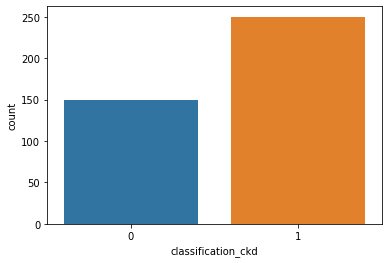

In [22]:
sns.countplot(x="classification_ckd",data=df)

There are many features that can help predict CKD. Here are some examples of good correlations between CKD and features. Some features of interest are "sc" and "bgr" where negative CKD have low varience low mean values whilst positive CKD have high mean high variance values.

<AxesSubplot:xlabel='sc', ylabel='Count'>

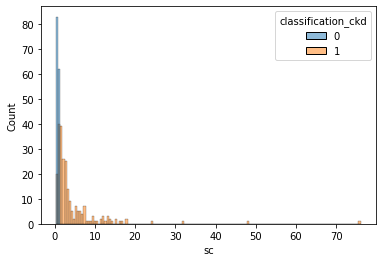

In [23]:
sns.histplot(x="sc",data=df,hue="classification_ckd")

<AxesSubplot:xlabel='bgr', ylabel='Count'>

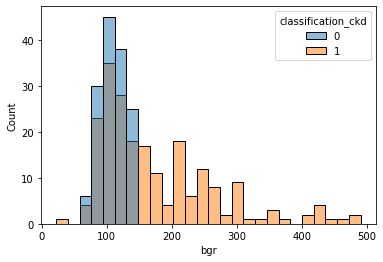

In [24]:
sns.histplot(x="bgr",data=df,hue="classification_ckd")

Every patient who had normal rbc had negative CKD.

<AxesSubplot:xlabel='rbc_normal', ylabel='count'>

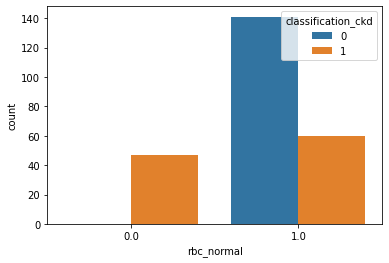

In [25]:
sns.countplot(data=df,x="rbc_normal",hue="classification_ckd")

# Data cleaning (missing values)

Lets see how much missing data we have.

<AxesSubplot:>

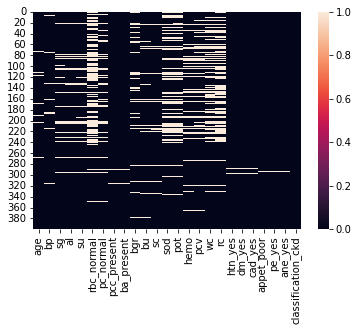

In [26]:
sns.heatmap(df.isna())

For each column, what percentage of entries are nan.

In [27]:
print(df.apply(lambda feat: np.mean(feat.isna())))

age                   0.0225
bp                    0.0300
sg                    0.1175
al                    0.1150
su                    0.1225
rbc_normal            0.3800
pc_normal             0.1625
pcc_present           0.0100
ba_present            0.0100
bgr                   0.1100
bu                    0.0475
sc                    0.0425
sod                   0.2175
pot                   0.2200
hemo                  0.1300
pcv                   0.1775
wc                    0.2650
rc                    0.3275
htn_yes               0.0050
dm_yes                0.0050
cad_yes               0.0050
appet_poor            0.0025
pe_yes                0.0025
ane_yes               0.0025
classification_ckd    0.0000
dtype: float64


## Reduce dataset due to sparse missing entries

There are many features here that only have a small amount of missing values (<5%). Removing patients with nan values in these columns should not vastly reduce the total number of patients.

In [28]:
df_feat_with_na_small = df.columns[df.apply(lambda feat: np.mean(feat.isna()))<0.05]
df.dropna(subset=df_feat_with_na_small,axis=0,inplace=True)

We have now reduced our dataset from 400 to 355 entries.

In [29]:
len(df.index)

355

<AxesSubplot:>

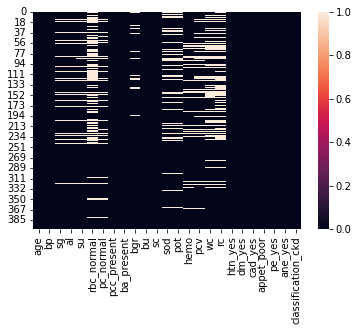

In [30]:
sns.heatmap(df.isna())

Many of the features with missing data have continuous entires. With these we will either fill in the mean value of the feature, or remove the feature. However, for cagegorical features with a lot of missing data ("rbc") and ("pc") averaging with give values inbetween the cagogorical data, therefore, we remove these.  

In [31]:
df.drop(['rbc_normal','pc_normal'],axis=1,inplace=True)

## Create datasets with different cleaning methods

We have a number of features with between 5% and 20% of missing data. We will now create several datasets where we treat this data differently, and see how it affects our machine learning performance.

### Dataset 0

Here we simply remove all features with missing data.

In [32]:
df_0 = df.copy(deep=True)

In [33]:
feat_any_na = df_0.columns[df_0.apply(lambda col: np.mean(col.isna()))>0]
df_0.drop(labels=feat_any_na,axis=1,inplace=True)

### Dataset 1

Here we remove all features that have over 15% of data missing. Then fill in all remaining missing data in a given feature, with the mean value of that feature.

In [34]:
df_1 = df.copy(deep=True)

In [35]:
feat_many_na = df_1.columns[df_1.apply(lambda col: np.mean(col.isna()))>0.15]
df_1.drop(columns=feat_many_na,axis=1,inplace=True)

In [36]:
for feat in df_1.columns:
    df_1[feat].fillna(df_1[feat].mean(),inplace=True)

### Dataset 2

Fill in all remaining missing data in a given feature, with the mean value of that feature.

In [37]:
df_2 = df.copy(deep=True)

In [38]:
for feat in df_2.columns:
    df_2[feat].fillna(df_2[feat].mean(),inplace=True)

# Machine learning

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

We perform several machine learning algorithms on our three (i= 1, 2 or 3) datasets. Using features X[i] we want to predict CKD classification y[i].

In [40]:
X = [df_0.drop(columns="classification_ckd",axis=1), df_1.drop(columns="classification_ckd",axis=1), 
    df_2.drop(columns="classification_ckd",axis=1)]
y = [df_0["classification_ckd"], df_1["classification_ckd"], df_2["classification_ckd"]]

As we are trying to diagnose CKD before further tests we want to reduce false negatives. In other words we want to maximise recall = tp / (tp + fn) where tp = true positive and fn = false negative.

## A - Logistic regression

We predict CKD classification in three datasets with linear regression algorithm.

In [41]:
recall_log_reg, f1_log_reg = [], []

for i in range(0,3):
    min_max_scaler = preprocessing.MinMaxScaler()
    X_minmax = min_max_scaler.fit_transform(X[i])
    X_train, X_test, y_train, y_test = train_test_split(X_minmax, y[i], test_size=0.30)

    logmodel = LogisticRegression()
    logmodel.fit(X_train,y_train)
    pred = logmodel.predict(X_test)
    
    recall_log_reg.append(recall_score(y_test,pred))
    f1_log_reg.append(f1_score(y_test,pred))

In [42]:
print('Recall from dataset A is {:.3f}, in dataset B it is {:.3f} whilst in C is it {:.3f}.'.format(recall_log_reg[0],recall_log_reg[1],recall_log_reg[2]))
print('F1 from dataset A is {:.3f}, in dataset B it is {:.3f} whilst in C is it {:.3f}.'.format(f1_log_reg[0],f1_log_reg[1],f1_log_reg[2]))

Recall from dataset A is 0.956, in dataset B it is 1.000 whilst in C is it 0.952.
F1 from dataset A is 0.977, in dataset B it is 1.000 whilst in C is it 0.975.


For logistic regreesion the best dataset is 1 or 2 - the best dataset flips between the two after repeating code. In these datasets at least some missing values in a given feature were replaced with mean of that feature. 

## K Nearest neighbours

We predict CKD classification in three datasets with linear regression algorithm.

In [43]:
recall_knn, f1_knn = [], []

for i in range(0,3):
    recall_vector, f1_vector = [], []
    scaler = StandardScaler()
    scaler.fit(X[i])
    scaled_features = scaler.transform(X[i])
      
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, y[i], test_size=0.30)
    for k in range(1,30):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        pred = knn.predict(X_test)
        
        recall_vector.append(recall_score(y_test,pred))
        f1_vector.append(f1_score(y_test,pred))
    
    recall_knn.append(recall_vector)
    f1_knn.append(f1_vector)
        

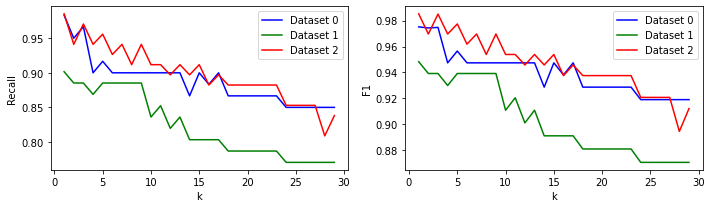

In [44]:
fig, axs = plt.subplots(1,2,figsize=(10,3))
colour = ['b','g','r']
for i in range(0,3):
    axs[0].plot(range(1,30),recall_knn[i], color=colour[i], label='Dataset {}'.format(i))
    axs[1].plot(range(1,30),f1_knn[i], color=colour[i], label='Dataset {}'.format(i))

axs[0].set_xlabel('k'), axs[0].set_ylabel('Recall'), axs[0].legend()
axs[1].set_xlabel('k'), axs[1].set_ylabel('F1'), axs[1].legend()

fig.tight_layout()

Here we can see that the best model is for k=1:

In [45]:
print('For k=1 the recall values for dataset 0 is {:.3f}, 1 is {:.3f} and 2 is {:.3f}.'.format(recall_knn[0][0],recall_knn[1][0],recall_knn[2][0]))
print('For k=1 the F1 values for dataset 0 is {:.3f}, 1 is {:.3f} and 2 is {:.3f}.'.format(f1_knn[0][0],f1_knn[1][0],f1_knn[2][0]))

For k=1 the recall values for dataset 0 is 0.983, 1 is 0.902 and 2 is 0.985.
For k=1 the F1 values for dataset 0 is 0.975, 1 is 0.948 and 2 is 0.985.


For k nearest neighbours the best k value seems to be k = 1. The best dataset is either 1 or 2 from repeating code.

## Random forest

In [46]:
recall_random_forest, f1_random_forest = [], []

for i in range(0,3):
    
    X_train, X_test, y_train, y_test = train_test_split(X[i], y[i], test_size=0.30)
    rfc = RandomForestClassifier(n_estimators=1000)
    rfc.fit(X_train,y_train)
    pred = rfc.predict(X_test)

    recall_random_forest.append(recall_score(y_test,pred))
    f1_random_forest.append(f1_score(y_test,pred))

In [47]:
print('Recall from dataset A is {:.3f}, in dataset B it is {:.3f} whilst in C is it {:.3f}.'.format(recall_random_forest[0],recall_random_forest[1],recall_random_forest[2]))
print('F1 from dataset A is {:.3f}, in dataset B it is {:.3f} whilst in C is it {:.3f}.'.format(f1_random_forest[0],f1_random_forest[1],f1_random_forest[2]))

Recall from dataset A is 0.952, in dataset B it is 1.000 whilst in C is it 1.000.
F1 from dataset A is 0.967, in dataset B it is 1.000 whilst in C is it 1.000.


For random forest, upon repeating code, all datasets perform roughly equally.

# Conclusion

To conclude, CKD is successfully predicted using three supervised machine learning algorithms. High recall values (consistently over 0.9) were obtained for each algorithm incidating a low rate of false negatives - an important feature considering this algorithm would be a precursor to further diagnosis. On average the datasets that retained as many features as possible, by filling in missing entries with the mean of the feature performed best. Other methods of filling in missing values could be attempted - for example, finding correlations between two features and using one feature to predict the missing values in another feature.

Further study could split the dataset in to three sections (train, validation and test) - optimum algorithms and parameters could then be chosen in the validation stage to get a more accurate final performance assessment. In addition, algorithms could have been repeatably ran to obtain average recall values to better determine their relative performance.